In [72]:
%run setup.ipynb
%matplotlib inline
%config InlineBackend.figure_formats = {'retina', 'png'}
rcParams['figure.dpi'] = 120
rcParams['savefig.dpi'] = 120
rcParams['figure.facecolor'] = 'w'
import hapclust

In [152]:
pop_labels = phase1_ar3.pop_labels

In [2]:
callset_haps = zarr.open('../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3.1/haplotypes/main/zarr/ag1000g.phase1.ar3.1.haplotypes/')
callset_haps

<zarr.hierarchy.Group '/'>

In [3]:
callset_haps.tree()

/
 ├── 2L
 │   ├── calldata
 │   │   └── GT (8296600, 773, 2) int8
 │   ├── samples (773,) |S8
 │   └── variants
 │       ├── ALT (8296600,) |S1
 │       ├── POS (8296600,) int32
 │       └── REF (8296600,) |S1
 ├── 2R
 │   ├── calldata
 │   │   └── GT (11332702, 773, 2) int8
 │   ├── samples (773,) |S8
 │   └── variants
 │       ├── ALT (11332702,) |S1
 │       ├── POS (11332702,) int32
 │       └── REF (11332702,) |S1
 ├── 3L
 │   ├── calldata
 │   │   └── GT (7449486, 773, 2) int8
 │   ├── samples (773,) |S8
 │   └── variants
 │       ├── ALT (7449486,) |S1
 │       ├── POS (7449486,) int32
 │       └── REF (7449486,) |S1
 └── 3R
     └── calldata
         └── GT (10178803, 773, 2) int8

In [4]:
callset_haps['2L/calldata/GT'].info

Name,/2L/calldata/GT
Type,zarr.core.Array
Data type,int8
Shape,"(8296600, 773, 2)"
Chunk shape,"(524288, 51, 2)"
Order,C
Read-only,False
Compressor,"Blosc(cname='zstd', clevel=1, shuffle=AUTOSHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,12826543600 (11.9G)
No. bytes stored,234535135 (223.7M)


In [5]:
haps = allel.GenotypeDaskArray(callset_haps['2L/calldata/GT']).to_haplotypes()
haps

<HaplotypeDaskArray shape=(8296600, 1546) dtype=int8>

In [6]:
pos = allel.SortedIndex(callset_haps['2L/variants/POS'])
pos

0,1,2,3,4,...,8296595,8296596,8296597,8296598,8296599
44688,44691,44732,44736,44756,...,49356424,49356425,49356426,49356429,49356435


In [7]:
window_size = 1710

In [8]:
import pandas as pd

In [9]:
df_haps = pd.read_csv('../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3.1/haplotypes/haplotypes.meta.txt',
                      sep='\t', index_col='index')
df_haps.head()

,label,ox_code,population,label_aug,country,region,sex,m_s,kt_2la,kt_2rb
index,,,,,,,,,,
0,AB0085-Ca,AB0085-C,BFS,"AB0085-Ca [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
1,AB0085-Cb,AB0085-C,BFS,"AB0085-Cb [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
2,AB0087-Ca,AB0087-C,BFM,"AB0087-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
3,AB0087-Cb,AB0087-C,BFM,"AB0087-Cb [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
4,AB0088-Ca,AB0088-C,BFM,"AB0088-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,0.0


In [36]:
pop1, pop2 = 'GNS', 'BFS'
n = 30
pop1_ix = df_haps[df_haps.population == pop1].index.values
pop1_ix = np.random.choice(pop1_ix, size=n, replace=False)
pop2_ix = df_haps[df_haps.population == pop2].index.values
pop2_ix = np.random.choice(pop2_ix, size=n, replace=False)
pop1_ix.sort()
pop2_ix.sort()
pop1_ix, pop2_ix

(array([1468, 1469, 1471, 1474, 1476, 1477, 1478, 1479, 1481, 1483, 1484,
        1486, 1487, 1489, 1491, 1496, 1499, 1501, 1502, 1503, 1504, 1505,
        1506, 1513, 1514, 1516, 1520, 1521, 1526, 1529]),
 array([  0,  28,  44,  46,  54,  56,  60,  68,  70,  71,  92,  95,  97,
        100, 101, 102, 104, 109, 123, 161, 165, 168, 172, 213, 218, 225,
        229, 248, 265, 297]))

In [37]:
haps1 = haps.take(pop1_ix, axis=1).compute()
haps2 = haps.take(pop2_ix, axis=1).compute()

In [38]:
haps1

<HaplotypeArray shape=(8296600, 30) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [39]:
haps2

<HaplotypeArray shape=(8296600, 30) dtype=int8>
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

In [50]:
%%cython
# cython: wraparound=False
# cython: boundscheck=False


import numpy as np 
cimport numpy as np
import scipy


cdef int pdiffs(np.int8_t[:] h1, np.int8_t[:] h2):
    cdef:
        int i, n, v
    n = h1.shape[0]
    v = 0
    for i in range(n):
        v += (h1[i] != h2[i])
    return v
    


def pdiffs_between(np.int8_t[:, :] h1, np.int8_t[:, :] h2):
    assert h1.ndim == h2.ndim == 2
    cdef:
        int i, j, n1, n2
        np.float32_t[:, :] out
    n1 = h1.shape[1]
    n2 = h2.shape[1]
    out = np.empty((n1, n2), dtype='f4')
    for i in range(n1):
        for j in range(n2):
            out[i, j] = pdiffs(h1[:, i], h2[:, j])
    return np.asarray(out)
            

In [51]:
def hh_between(h1, h2, threshold):
    pd = pdiffs_between(h1, h2).flatten()
    hh = (pd <= threshold).sum() / pd.shape[0]
    return hh

In [209]:
pop_labels

{'AOM': 'AO $coluzzii$',
 'BFM': 'BF $coluzzii$',
 'GWA': 'GW',
 'GNS': 'GN $gambiae$',
 'BFS': 'BF $gambiae$',
 'CMS': 'CM $gambiae$',
 'UGS': 'UG $gambiae$',
 'GAS': 'GA $gambiae$',
 'KES': 'KE',
 'colony': 'colony'}

In [210]:
df_haps.head()

,label,ox_code,population,label_aug,country,region,sex,m_s,kt_2la,kt_2rb
index,,,,,,,,,,
0,AB0085-Ca,AB0085-C,BFS,"AB0085-Ca [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
1,AB0085-Cb,AB0085-C,BFS,"AB0085-Cb [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
2,AB0087-Ca,AB0087-C,BFM,"AB0087-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
3,AB0087-Cb,AB0087-C,BFM,"AB0087-Cb [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
4,AB0088-Ca,AB0088-C,BFM,"AB0088-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,0.0


In [211]:
df_haps[df_haps.country == 'Cameroon'].groupby('region').size()

region
Daiguene         166
Gado-Badzere     140
Mayos            202
Zembe-Borongo     42
dtype: int64

In [212]:
@functools.lru_cache(maxsize=None)
def scan_hh_between(pop1, pop2, reg1=None, reg2=None, n=40, seed=42, startp=None, stopp=None, window_size=2000, window_step=2000, threshold=1):
    print('scan_hh_between', pop1, pop2, reg1, reg2, n)
    
    # initialize random seed
    np.random.seed(seed)
    
    # setup data
    loc1 = df_haps.population == pop1
    if reg1:
        loc1 = loc1 & (df_haps.region == reg1)
    pop1_ix = df_haps[loc1].index.values
    n1 = min(len(pop1_ix), n)
    pop1_ix = np.random.choice(pop1_ix, size=n1, replace=False)
    loc2 = df_haps.population == pop2
    if reg2:
        loc2 = loc2 & (df_haps.region == reg2)
    pop2_ix = df_haps[loc2].index.values
    n2 = min(len(pop2_ix), n)
    pop2_ix = np.random.choice(pop2_ix, size=n2, replace=False)
    pop1_ix.sort()
    pop2_ix.sort()
    loc = pos.locate_range(startp, stopp)
    haps1 = haps.take(pop1_ix, axis=1)[loc].compute()
    haps2 = haps.take(pop2_ix, axis=1)[loc].compute()
    p = pos[loc]
    h1 = np.asarray(haps1, order='F')
    h2 = np.asarray(haps2, order='F')
    
    # compute in moving windows
    midpoints = allel.moving_statistic(values=p, statistic=np.mean, size=window_size, step=window_step)
    windows = list(allel.stats.window.index_windows(values=p, size=window_size, step=window_step, start=0, stop=None))
    result = np.array([
        hh_between(h1[i:j], h2[i:j], threshold=threshold)
        for i, j in windows
    ], dtype=float)

    return midpoints, result
    

In [213]:
def plot_hh_between(pop1, pop2, reg1=None, reg2=None, ax=None, ylabel='HH', xlabel='Genome position (Mbp)', label_vgsc=True, **kwargs):
    
    x, y = scan_hh_between(pop1, pop2, reg1=reg1, reg2=reg2, **kwargs)
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 1))
        sns.despine(ax=ax, offset=5)
    ax.plot(x, y, color='k', lw=1)
    ax.set_xlim(0, np.max(x))
    ax.set_ylim(0, 1)
    if ylabel:
        ax.set_ylabel(ylabel)
    if xlabel:
        ax.set_xlabel(xlabel)
    ax.set_xticklabels([int(x//1e6) for x in ax.get_xticks()])
    ax.axvspan(2358158, 2431617, color='#ff6666', lw=1)
    if label_vgsc:
        ax.text((2431617 + 2431617) / 2, 1, '$Vgsc$', fontsize=8, ha='center', va='bottom')
    lbl1 = pop_labels[pop1]
    if reg1:
        lbl1 += ' ({})'.format(reg1)
    lbl2 = pop_labels[pop2]
    if reg2:
        lbl2 += ' ({})'.format(reg2)
    title = '{} vs. {}'.format(lbl1, lbl2)
    ax.text(.5, .9, title, transform=ax.transAxes,
            ha='center', va='top', fontsize=8)

    

In [203]:
sns.set_style('darkgrid')

In [228]:
def fig_hh_between(pop_pairs, figwidth=9, rowheight=1):
    nrows = len(pop_pairs)
    figsize = figwidth, rowheight * nrows
    fig, axs = plt.subplots(nrows=nrows, ncols=1, sharex=True, sharey=True, figsize=figsize)
    for i, (pop1, pop2, reg1, reg2) in enumerate(pop_pairs):
        ax = axs[i]
        label_vgsc = i == 0
        xlabel = 'Chromosome arm 2L position (Mbp)' if i == (nrows - 1) else None
        if i < (nrows - 1):
            sns.despine(ax=ax, offset=5, bottom=True)
            ax.xaxis.set_tick_params(length=0)
        else:
            sns.despine(ax=ax, offset=5)
        plot_hh_between(pop1, pop2, reg1=reg1, reg2=reg2, ax=ax, label_vgsc=label_vgsc, xlabel=xlabel)


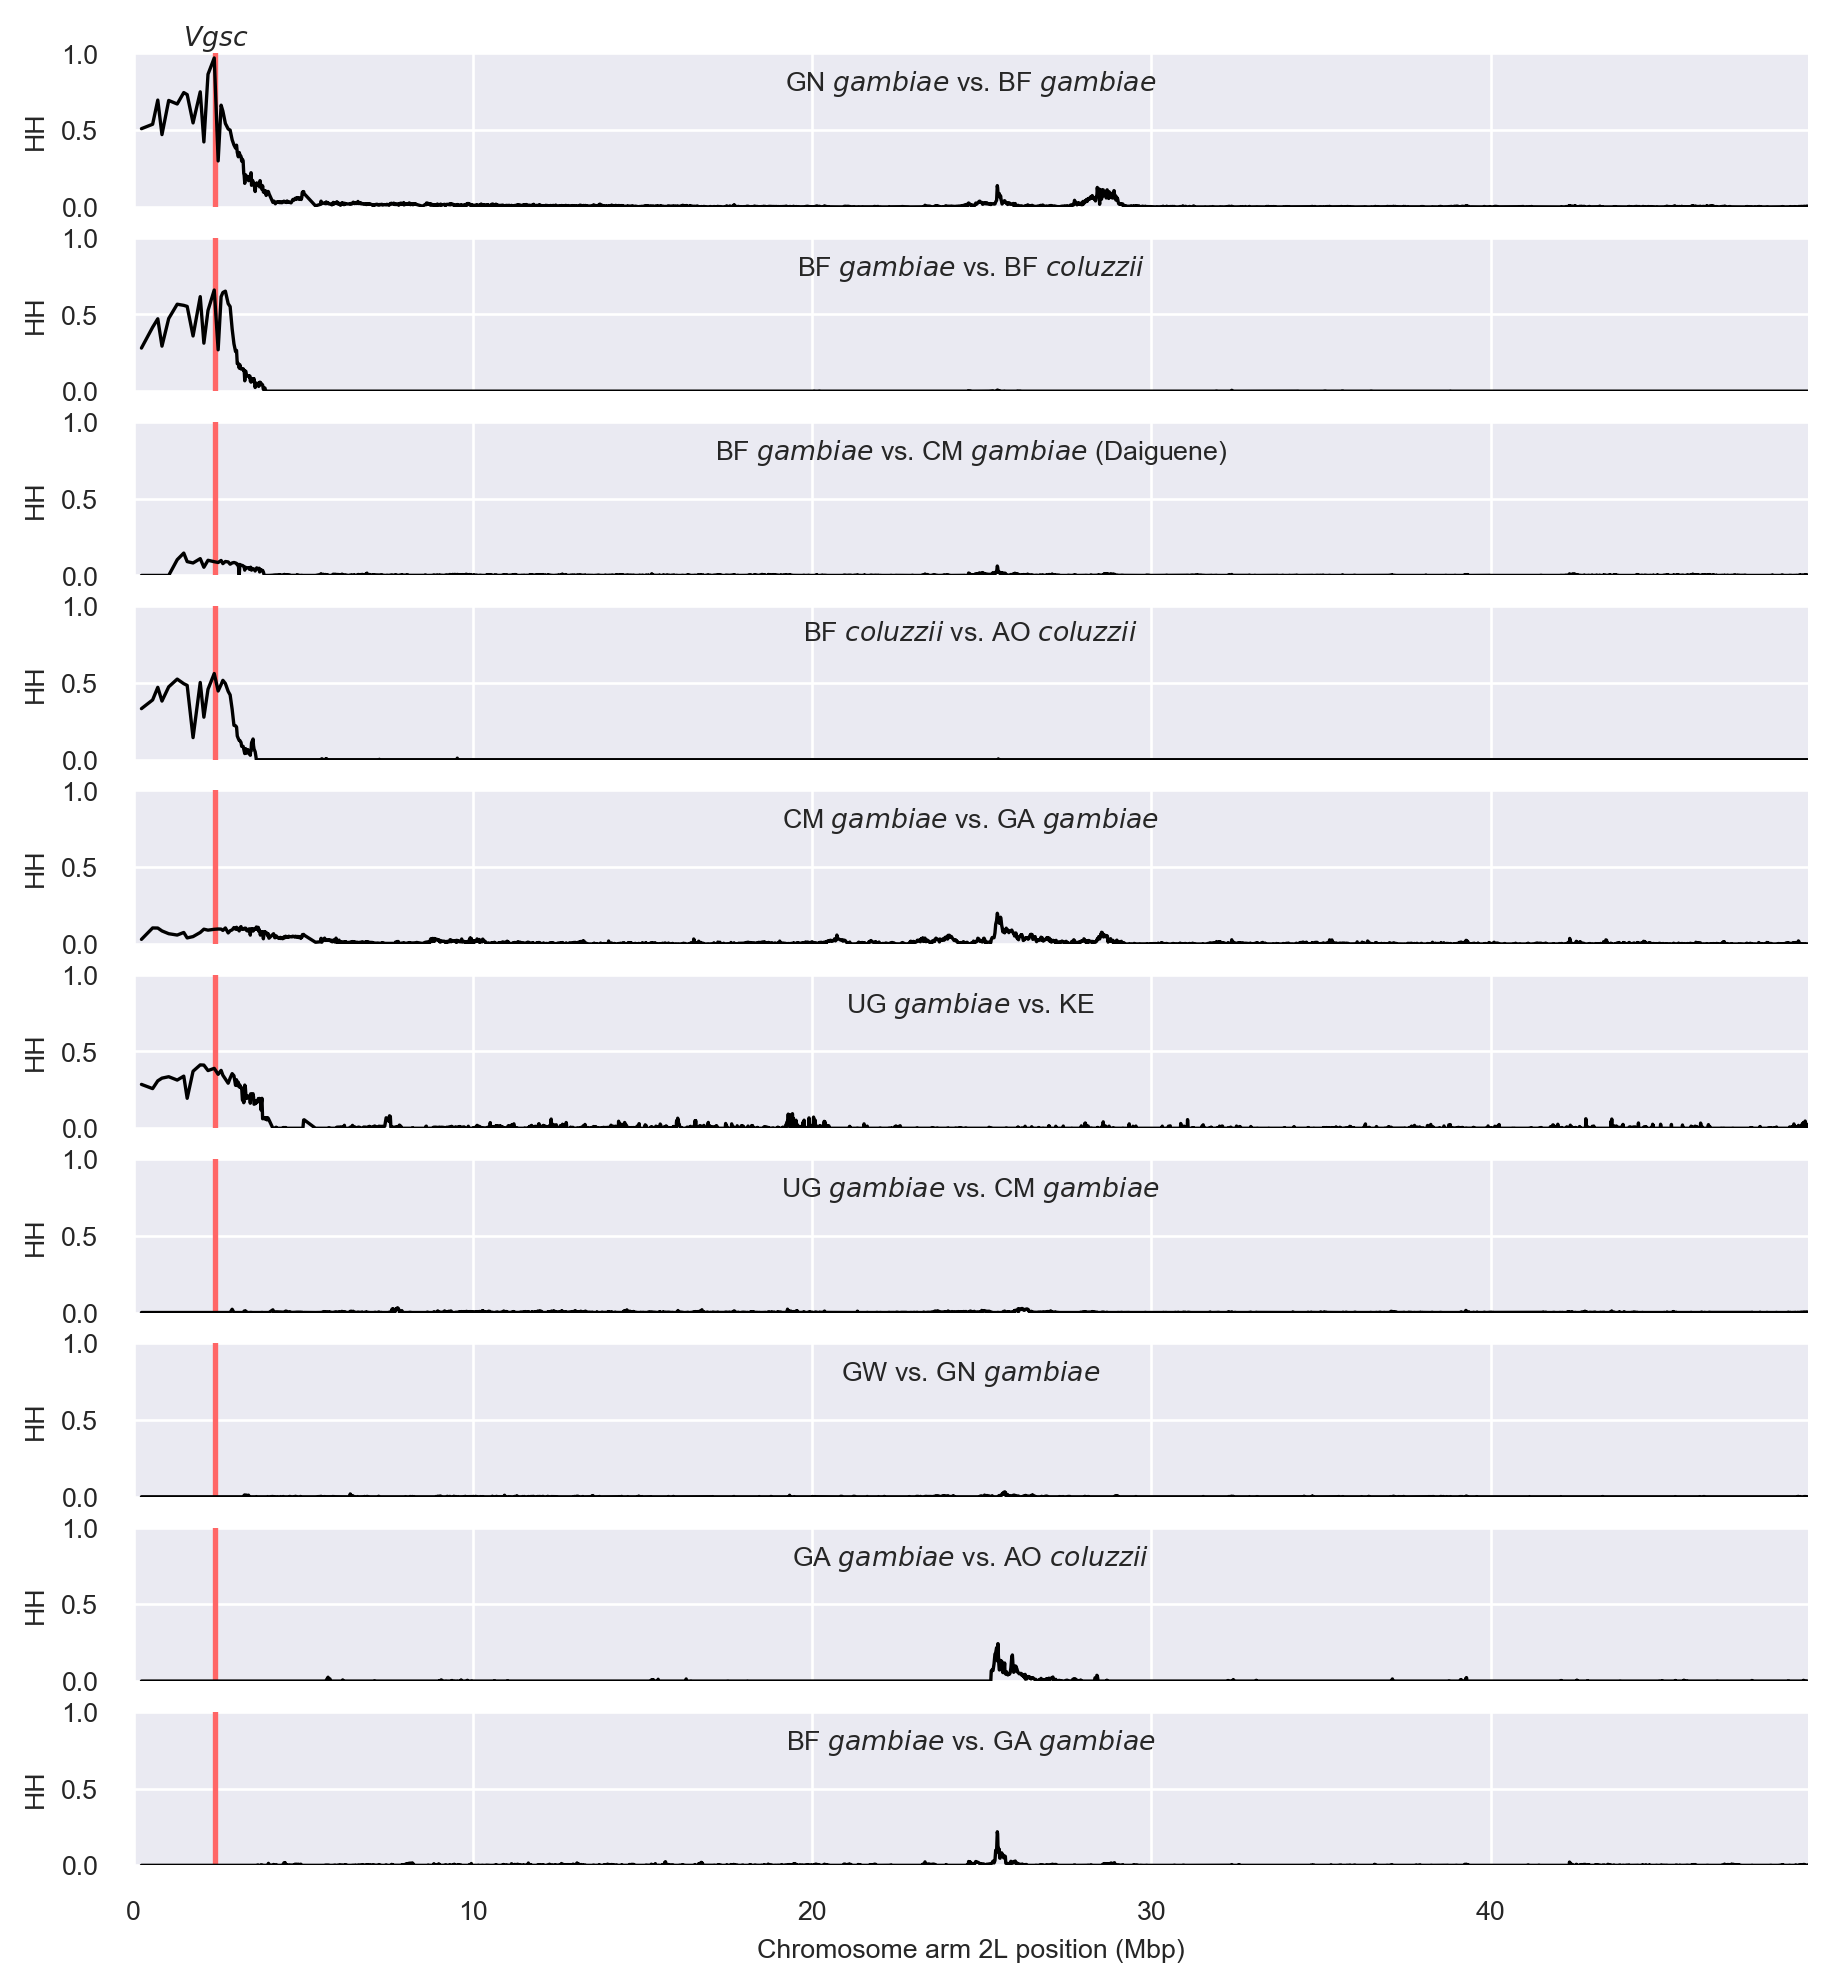

In [229]:
fig_hh_between([('GNS', 'BFS', None, None), 
                ('BFS', 'BFM', None, None),
                ('BFS', 'CMS', None, 'Daiguene'),
                ('BFM', 'AOM', None, None),
                ('CMS', 'GAS', None, None),
                ('UGS', 'KES', None, None),
                ('UGS', 'CMS', None, None),
                ('GWA', 'GNS', None, None),
                ('GAS', 'AOM', None, None),
                ('BFS', 'GAS', None, None)])

scan_hh_between BFS CMS None None 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


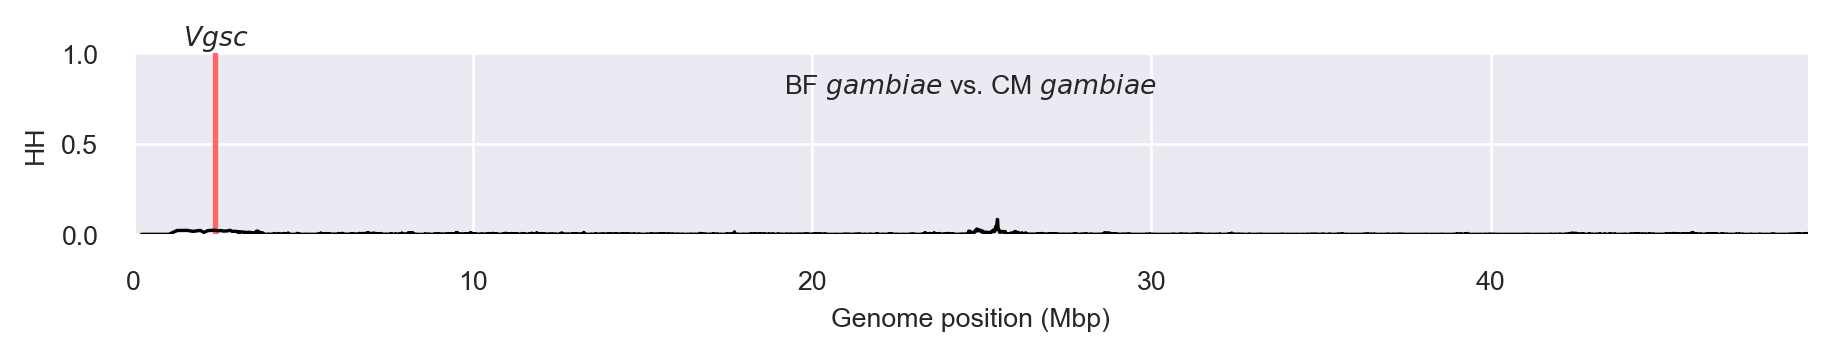

In [214]:
plot_hh_between('BFS', 'CMS')

scan_hh_between BFS CMS None Mayos 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


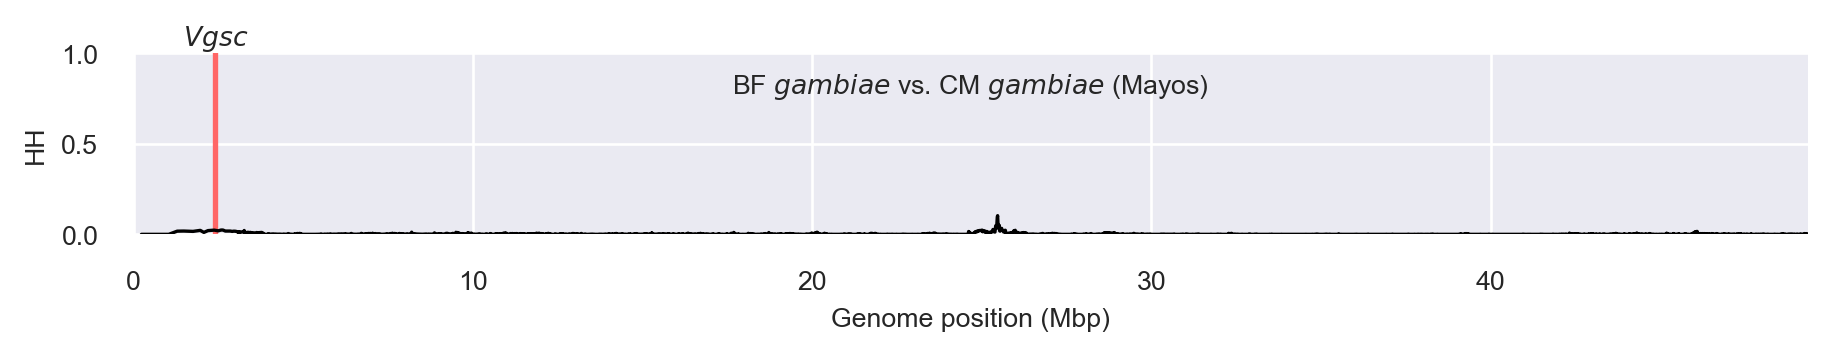

In [215]:
plot_hh_between('BFS', 'CMS', reg2='Mayos')

scan_hh_between BFS CMS None Zembe-Borongo 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


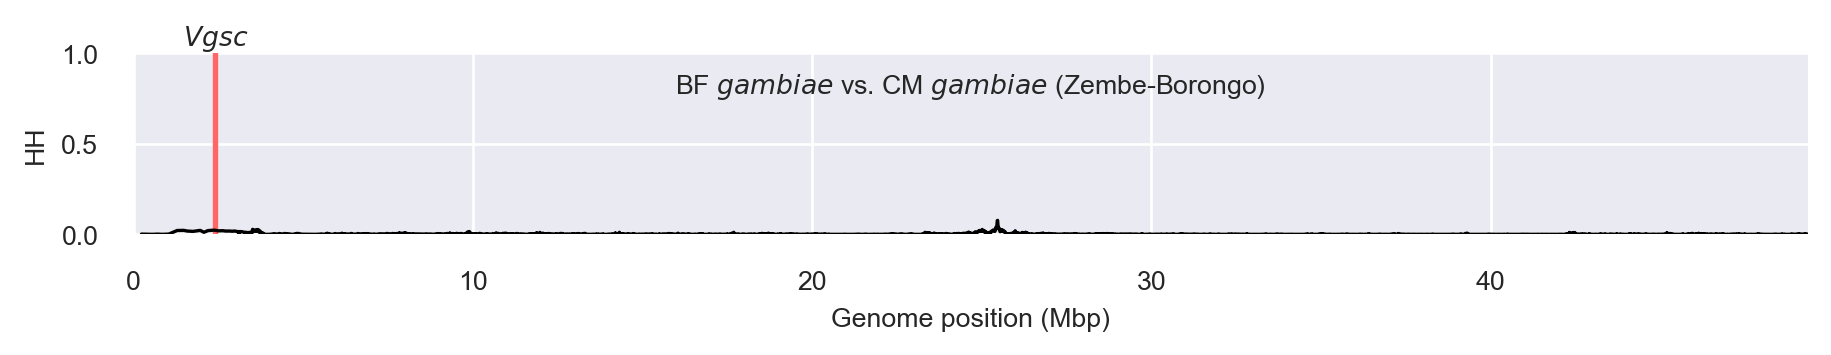

In [216]:
plot_hh_between('BFS', 'CMS', reg2='Zembe-Borongo')

scan_hh_between BFS CMS None Gado-Badzere 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


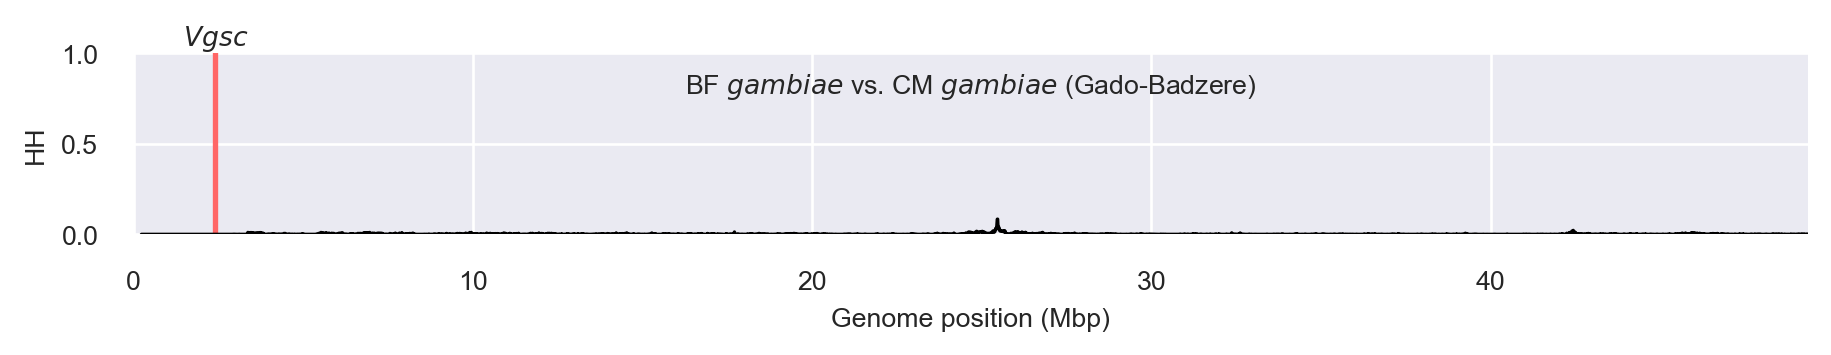

In [217]:
plot_hh_between('BFS', 'CMS', reg2='Gado-Badzere')

scan_hh_between BFS CMS None Daiguene 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


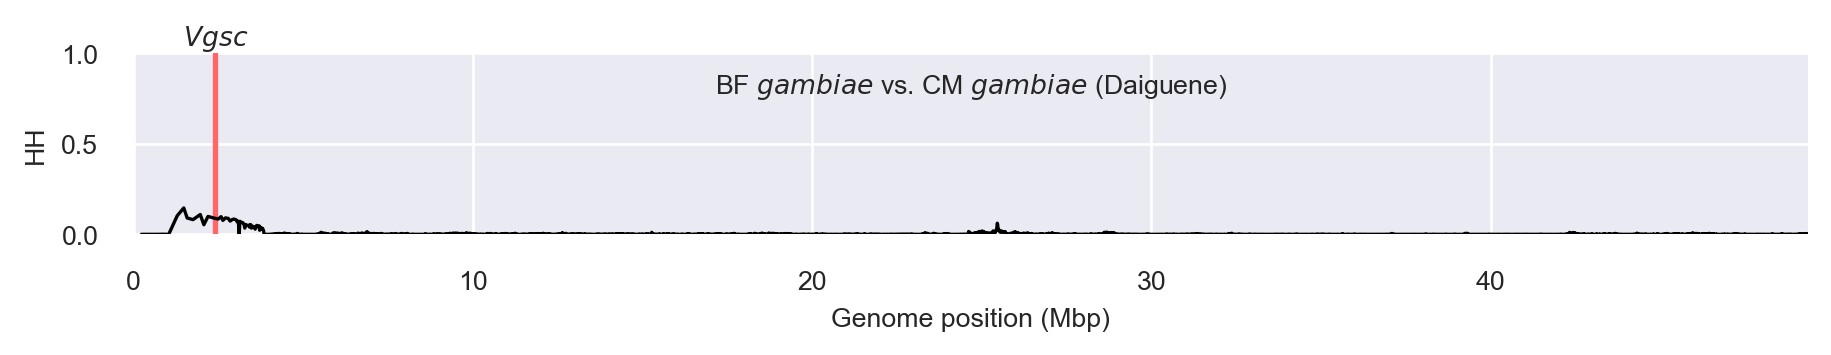

In [218]:
plot_hh_between('BFS', 'CMS', reg2='Daiguene')

scan_hh_between GAS CMS None Daiguene 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


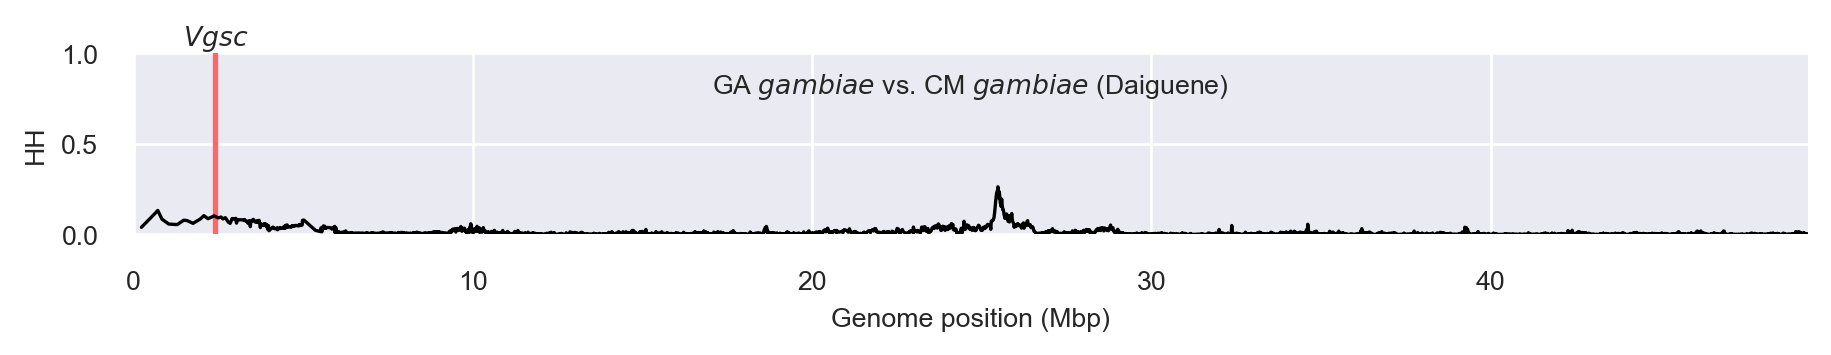

In [219]:
plot_hh_between('GAS', 'CMS', reg2='Daiguene')

scan_hh_between GAS CMS None Mayos 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


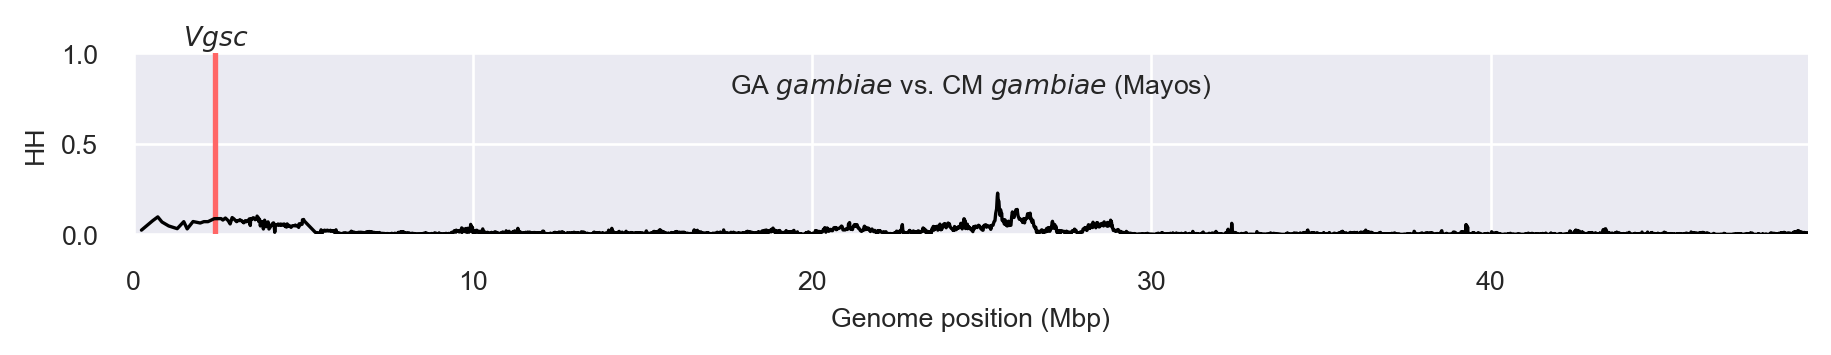

In [220]:
plot_hh_between('GAS', 'CMS', reg2='Mayos')

scan_hh_between GAS CMS None Zembe-Borongo 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


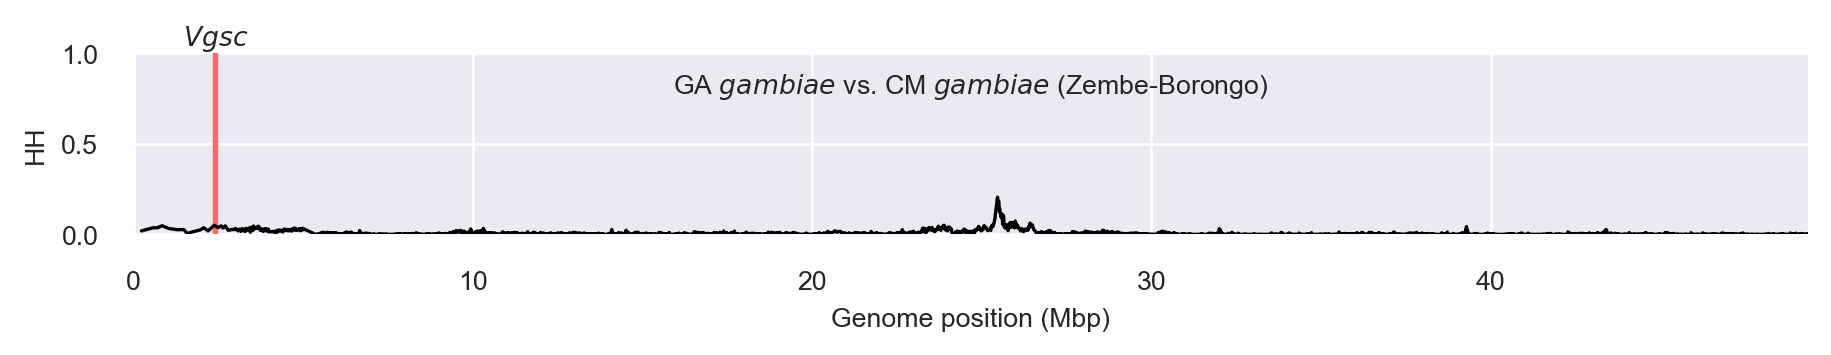

In [221]:
plot_hh_between('GAS', 'CMS', reg2='Zembe-Borongo')

scan_hh_between GAS CMS None Gado-Badzere 40


/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: generator 'index_windows' raised StopIteration


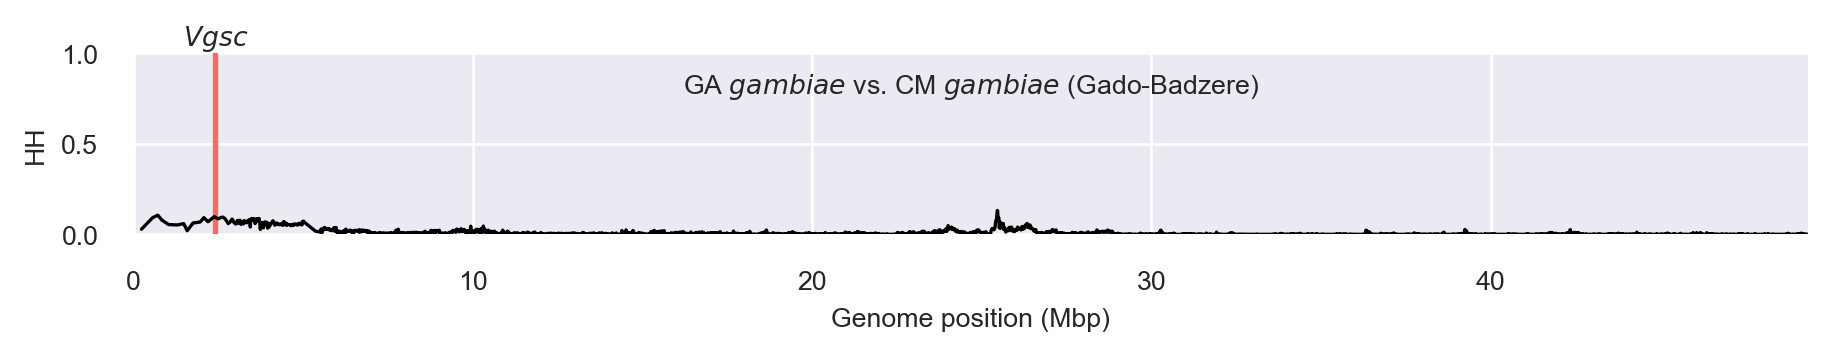

In [222]:
plot_hh_between('GAS', 'CMS', reg2='Gado-Badzere')

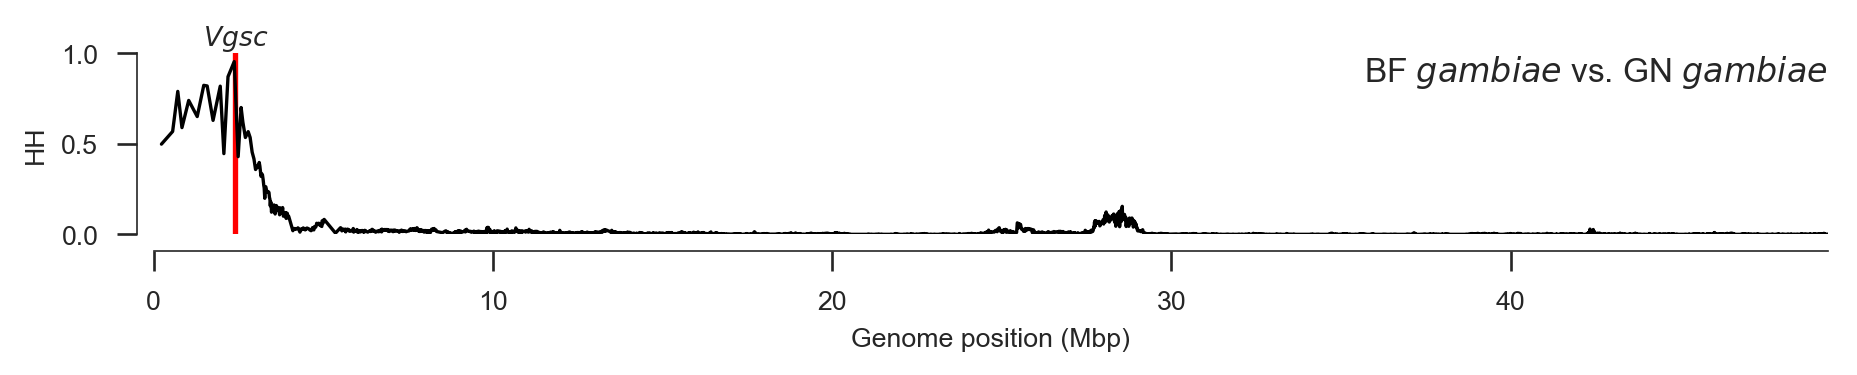

In [160]:
plot_hh_between('BFS', 'GNS')

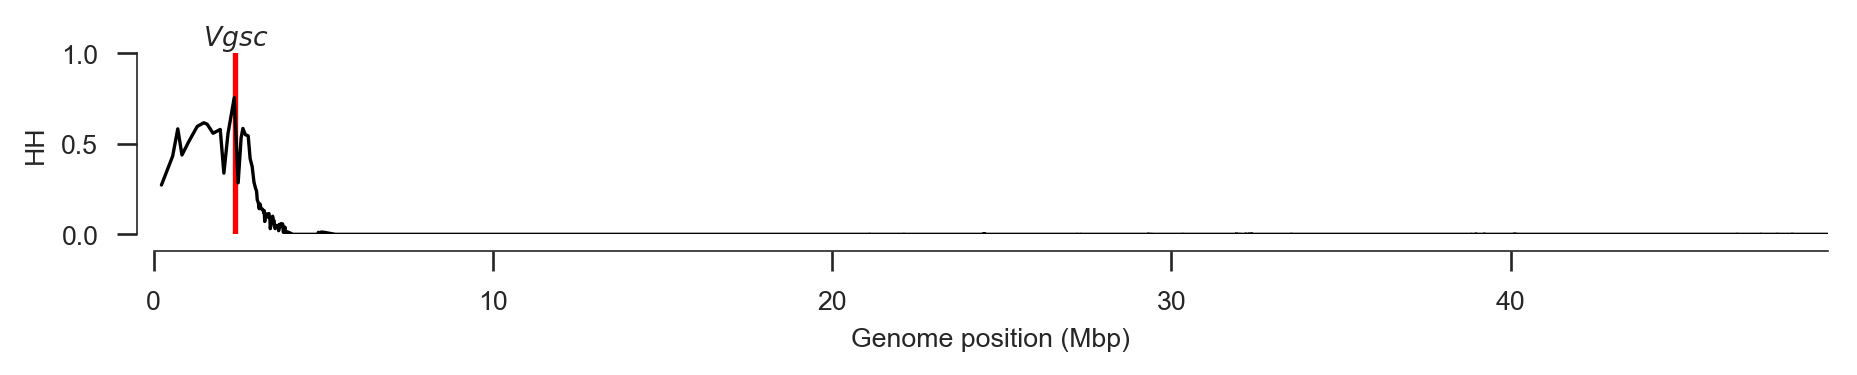

In [146]:
plot_hh_between('BFS', 'BFM')

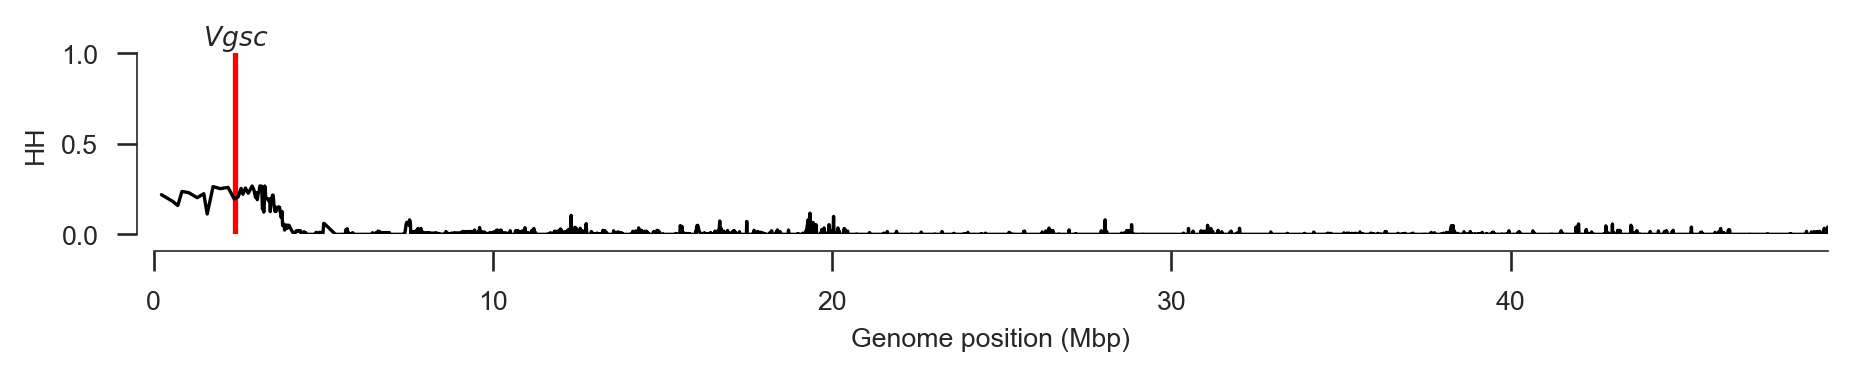

In [147]:
plot_hh_between('UGS', 'KES')

/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: generator 'index_windows' raised StopIteration


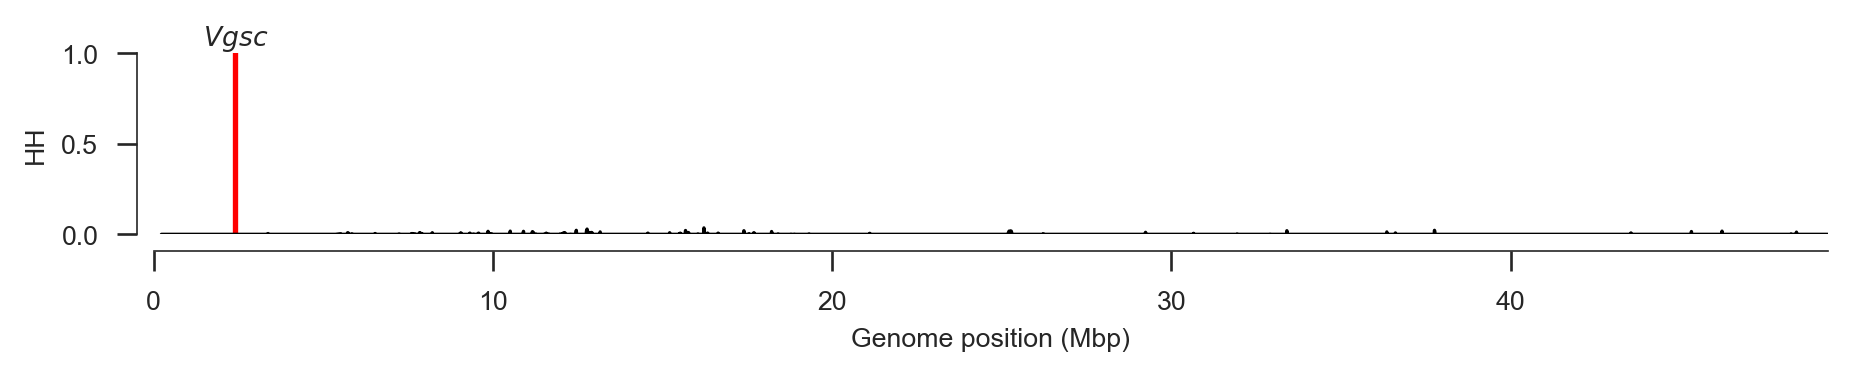

In [148]:
plot_hh_between('BFS', 'KES')

/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: generator 'index_windows' raised StopIteration


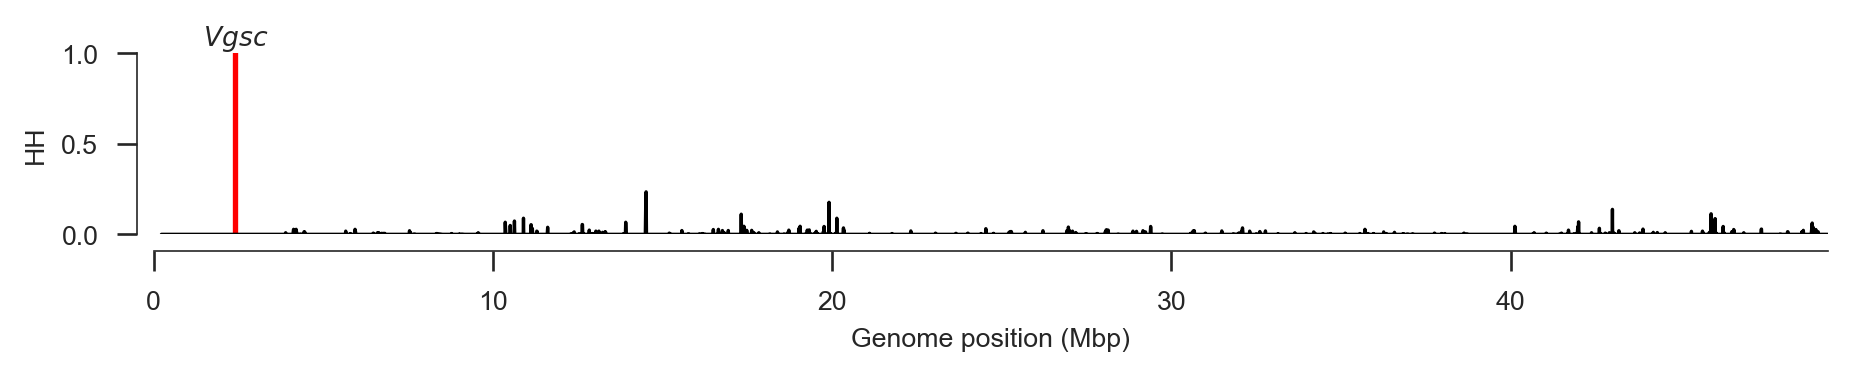

In [149]:
plot_hh_between('GAS', 'KES')

/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: generator 'index_windows' raised StopIteration


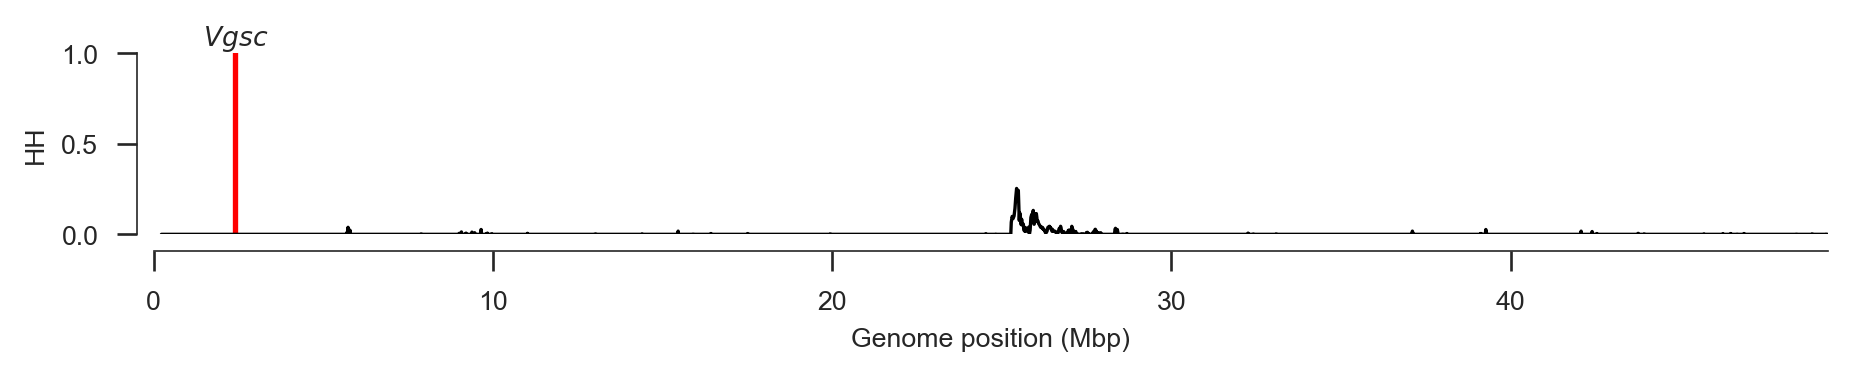

In [150]:
plot_hh_between('GAS', 'AOM')

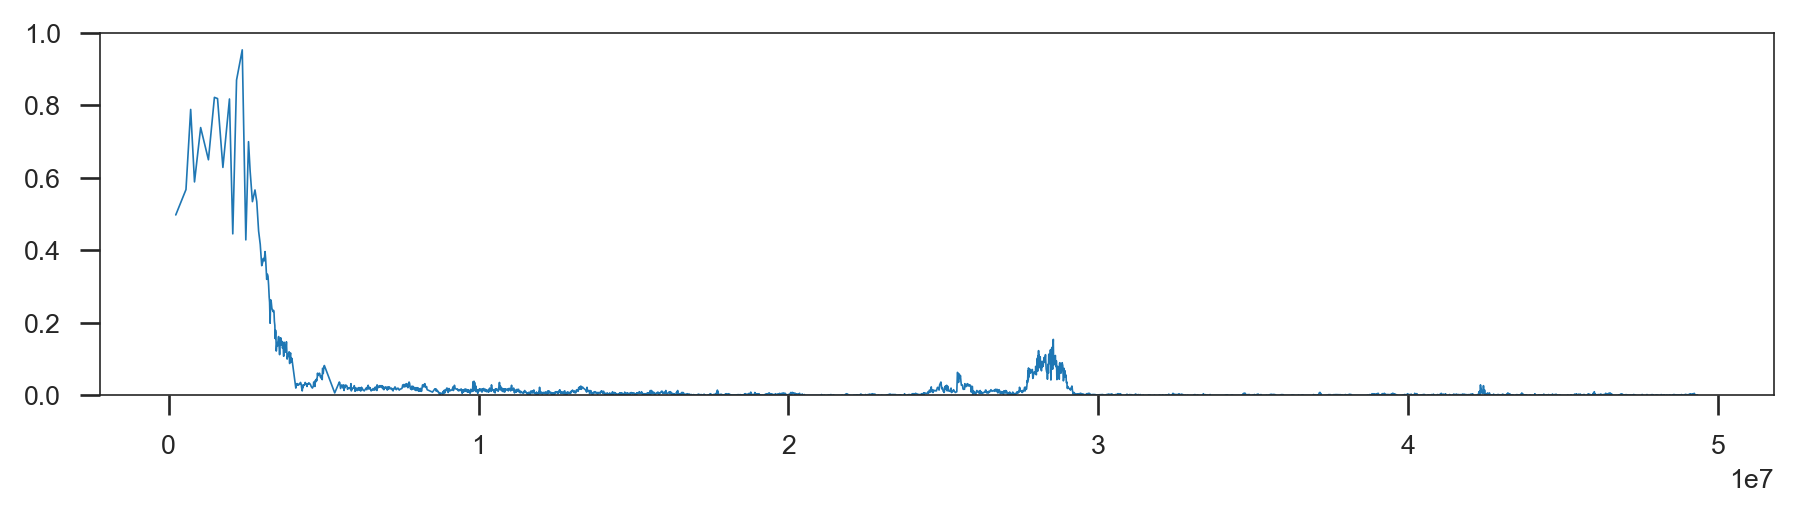

In [85]:
x, y = scan_hh_between('BFS', 'GNS')
fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(x, y)
ax.set_ylim(0, 1);

/home/aliman/github/alimanfoo/agam-vgsc-report/deps/conda/envs/agam-vgsc-report/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: generator 'index_windows' raised StopIteration


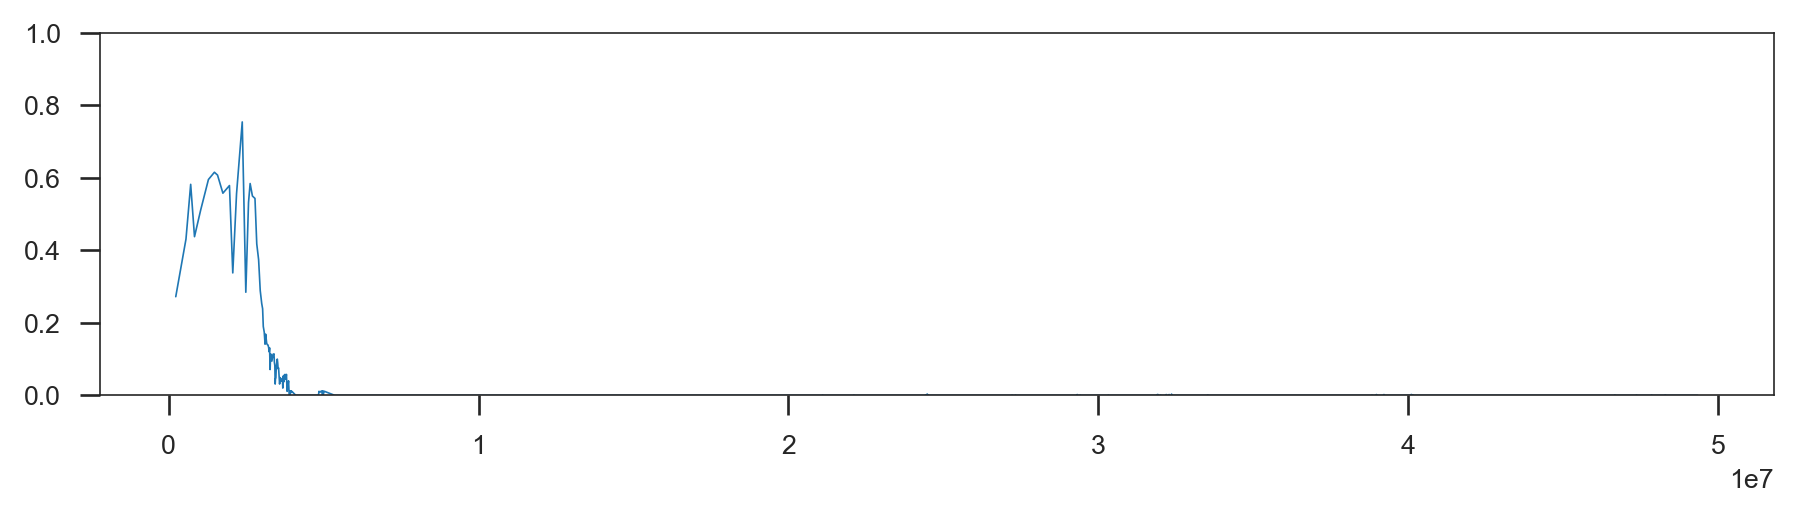

In [96]:
x, y = scan_hh_between('BFS', 'BFM')
fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(x, y)
ax.set_ylim(0, 1);

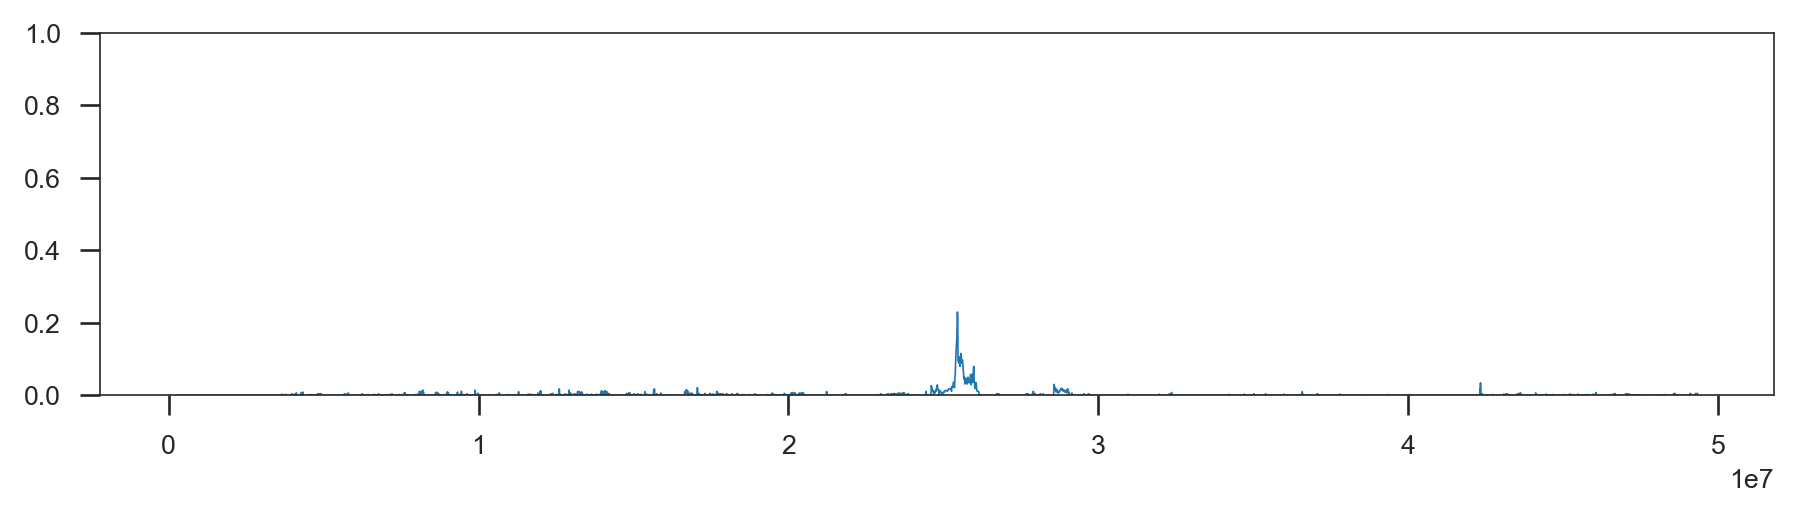

In [98]:
x, y = scan_hh_between('BFS', 'GAS')
fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(x, y)
ax.set_ylim(0, 1);

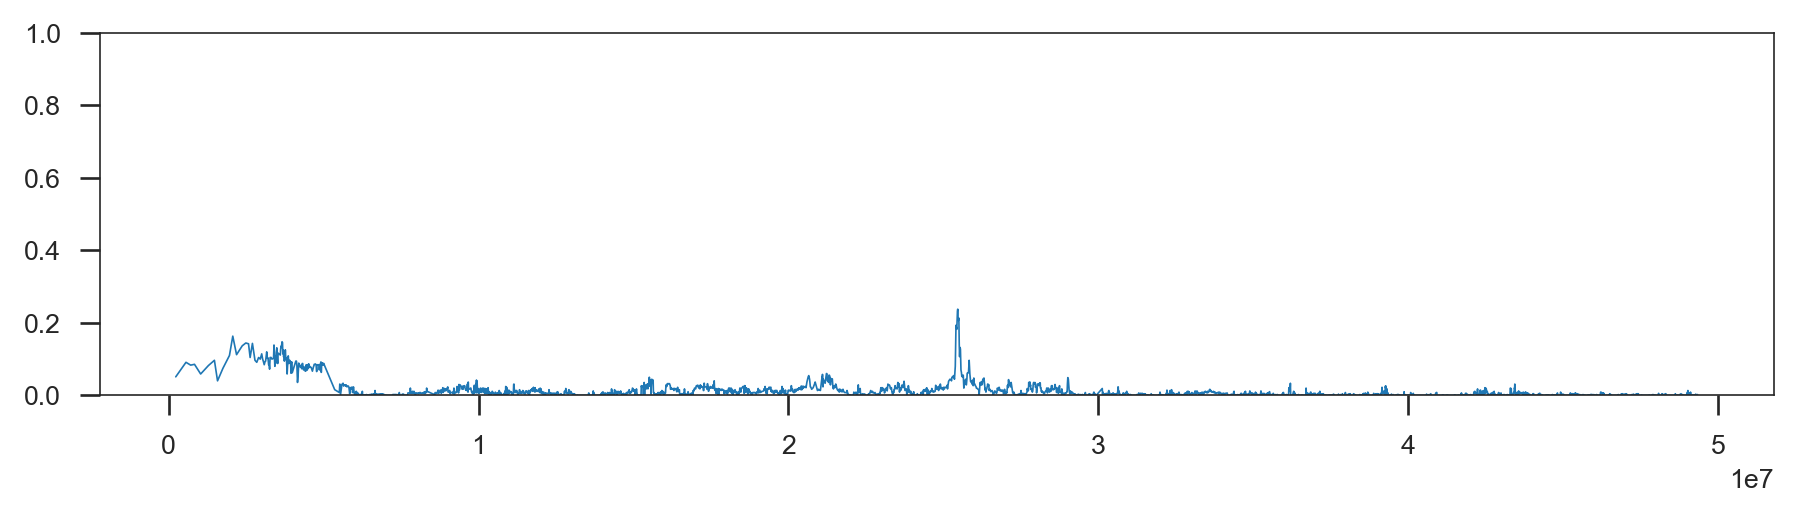

In [97]:
x, y = scan_hh_between('CMS', 'GAS')
fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(x, y)
ax.set_ylim(0, 1);